# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from scipy import stats
from scipy.stats import chi2_contingency, iqr

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, OneHotEncoder 
import pickle


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import warnings
warnings.filterwarnings('ignore') 

In [152]:
data = pd.read_csv(r'C:\Users\claud\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [153]:
data.columns = [x.lower().replace(" ", "_") for x in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [154]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [155]:
def hists(df):
    num = df.select_dtypes([np.number])
    for column in num.columns:
        sns.distplot(df[column])
        plt.show()

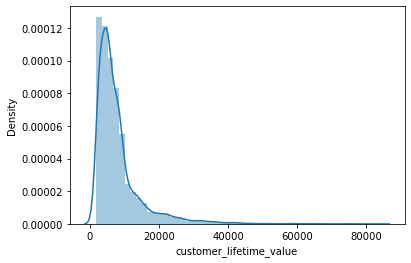

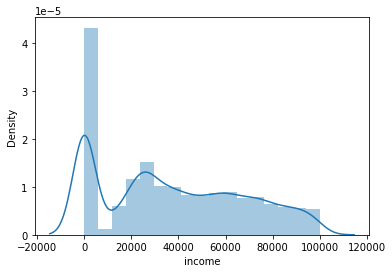

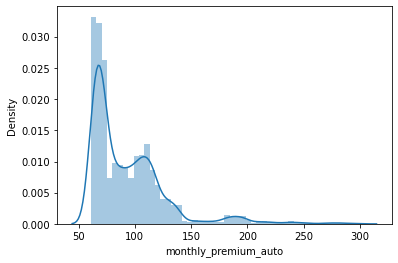

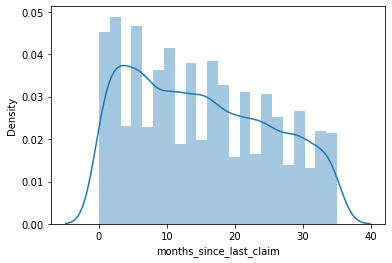

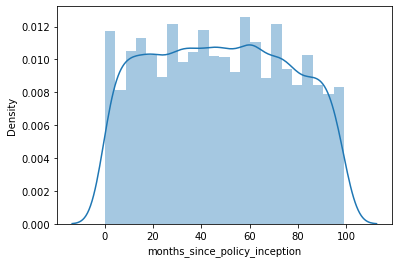

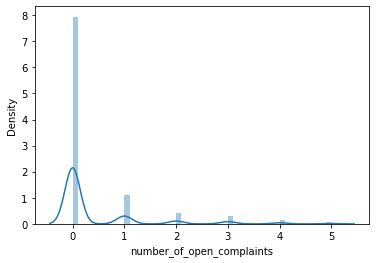

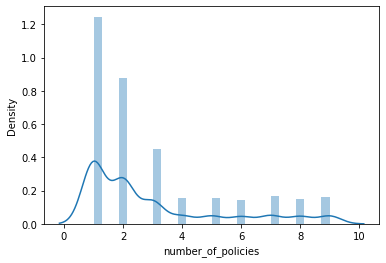

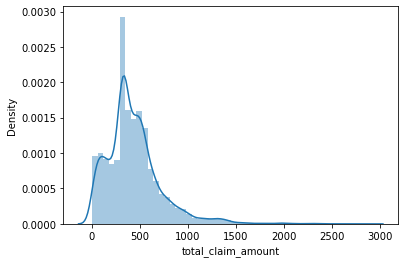

In [156]:
hists(data)

In [157]:
def boxplots(df):
    num = df.select_dtypes([np.number])
    for column in num.columns:
        sns.boxplot(x = column, data = df)
        plt.show()

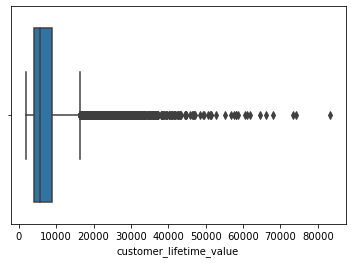

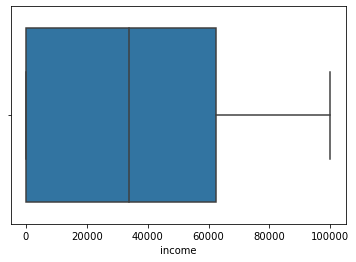

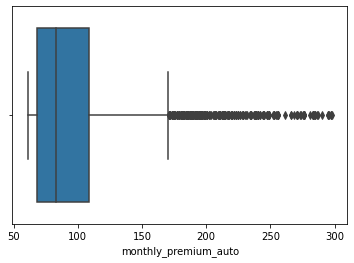

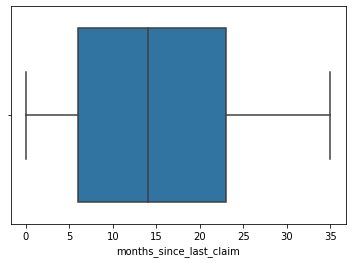

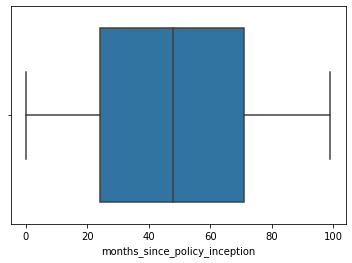

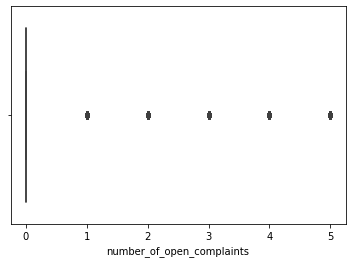

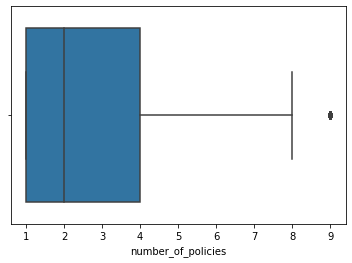

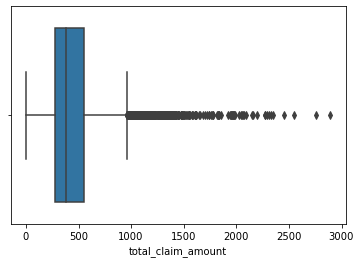

In [158]:
boxplots(data)

In [159]:
data['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [160]:
data1 = data.copy()
threshold = 1.5

in_columns = data1.select_dtypes(np.number).columns
skip_columns = ['income', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints']

for column in in_columns:
    if column not in skip_columns:
        upper = np.percentile(data1[column],75)
        lower = np.percentile(data1[column],25)
        iqr = upper - lower
        upper_limit = upper + (threshold * iqr)
        lower_limit = lower - (threshold * iqr)
        data1 = data1[(data1[column]>lower_limit) & (data1[column]<upper_limit)]

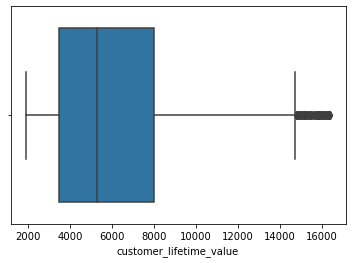

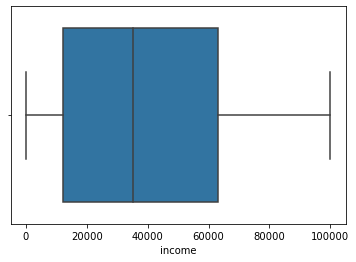

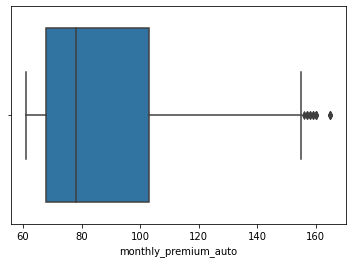

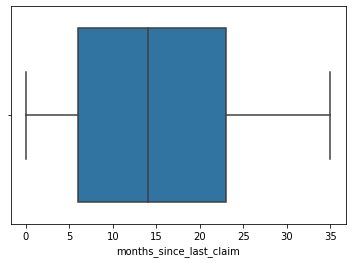

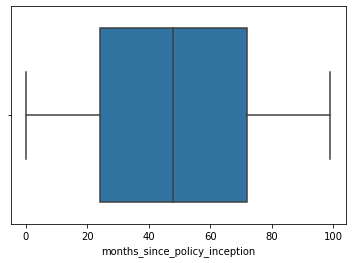

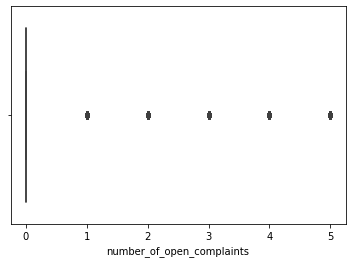

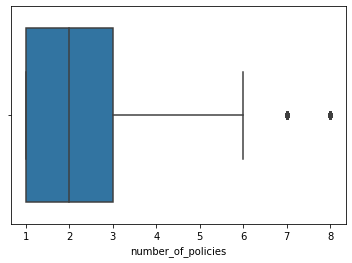

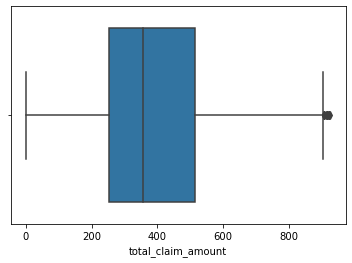

In [161]:
boxplots(data1)

In [162]:
data1.shape

(7399, 24)

### 2. Create a copy of the dataframe for the data wrangling.

In [205]:
data2 = data1.copy()

In [206]:
data2 = data2.set_index('customer')

### 3. Normalize the continuous variables. You can use any one method you want.

In [207]:
numericals = data2.select_dtypes(np.number)

In [227]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
OC83172,8256.297800,62902,69,14,94,0,2,159.383042


In [208]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [229]:
numericals.index

Index(['BU79786', 'AI49188', 'WW63253', 'HB64268', 'OC83172', 'CF85061',
       'BQ94931', 'SX51350', 'VQ65197', 'DP39365',
       ...
       'BB10681', 'WZ45103', 'CB59349', 'AC13887', 'TF56202', 'YM19146',
       'PK87824', 'TD14365', 'UP19263', 'Y167826'],
      dtype='object', name='customer', length=7399)

- Standardization/Standard Scaler

In [231]:
transformer = StandardScaler().fit(numericals)

x_standardized = transformer.transform(numericals)
x_standardized = pd.DataFrame(x_standardized, index = numericals.index, columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'])

In [232]:
x_standardized.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,-1.037924,0.580752,-0.775939,1.696759,-1.541659,-0.421596,-0.821999,0.027605
AI49188,2.156415,0.333534,1.023425,0.299106,-0.361023,-0.421596,-0.346993,0.931647
WW63253,0.502573,-1.272446,0.931150,0.299106,0.604952,-0.421596,2.028033,0.749551
HB64268,-1.022093,0.171148,-0.591389,-0.299888,-0.146362,-0.421596,-0.821999,-1.200007
OC83172,0.695180,0.799023,-0.775939,-0.100224,1.642481,-0.421596,-0.346993,-1.094245


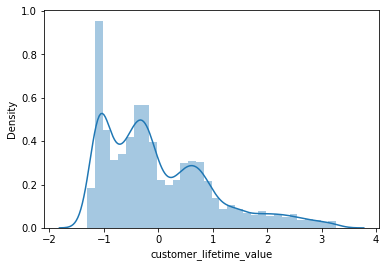

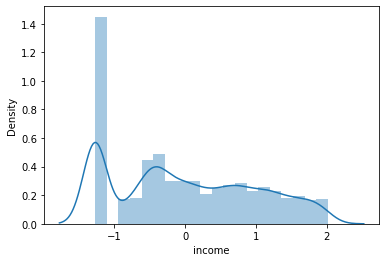

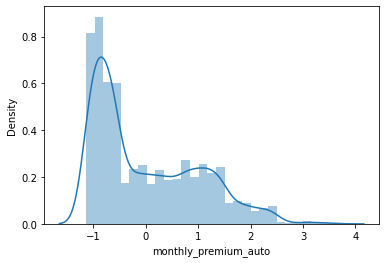

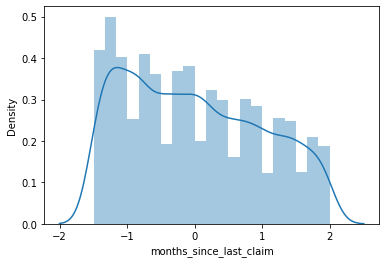

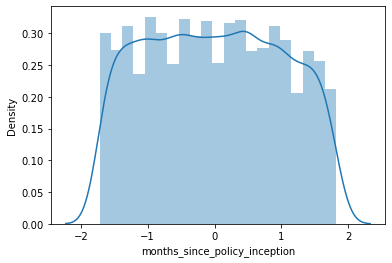

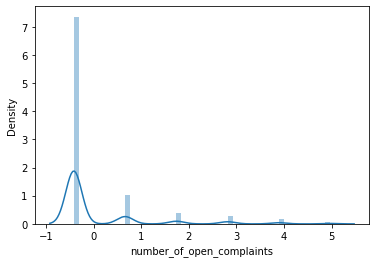

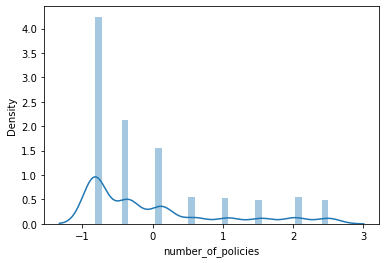

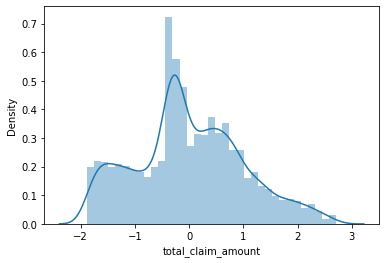

In [211]:
hists(x_standardized)

- Normalization

In [212]:
transformer = Normalizer()
transformer.fit(numericals)
x_normalized = transformer.transform(numericals)
x_normalized = pd.DataFrame(x_normalized, columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'])

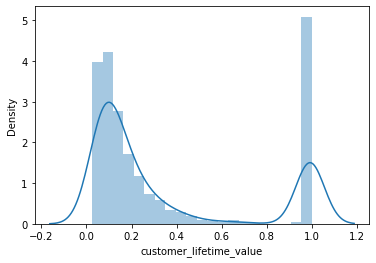

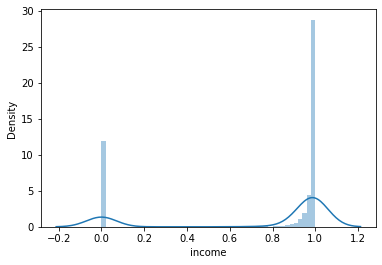

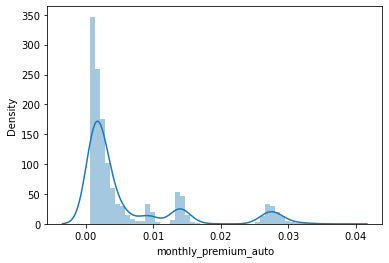

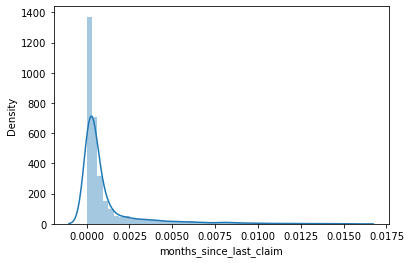

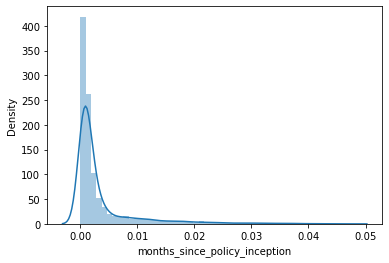

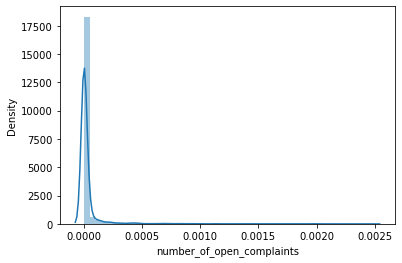

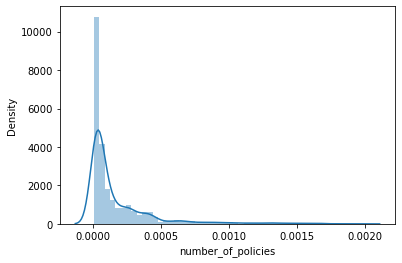

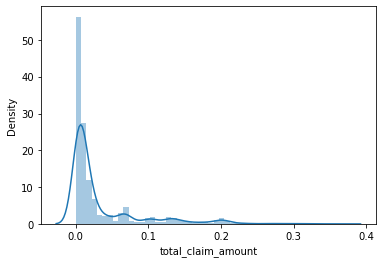

In [213]:
hists(x_normalized)

- Min-max scaler

In [214]:
transformer = MinMaxScaler().fit(numericals)
x_min_max = transformer.transform(numericals)
x_min_max = pd.DataFrame(x_min_max, columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'])

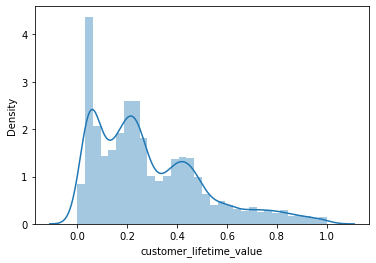

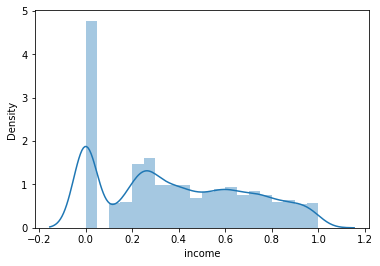

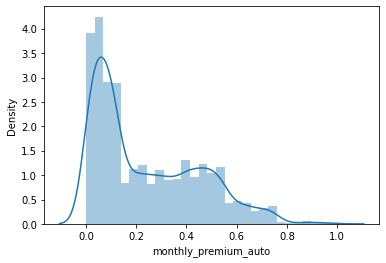

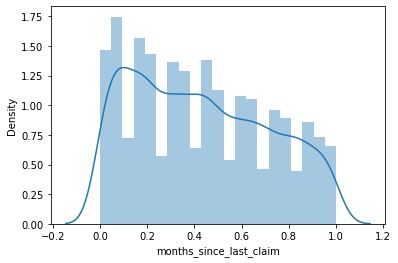

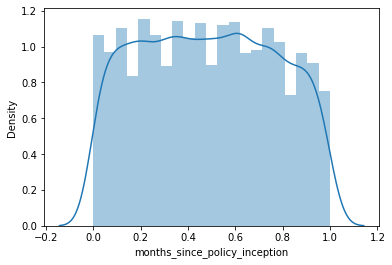

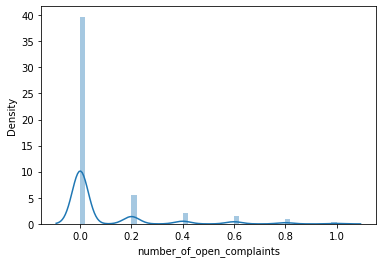

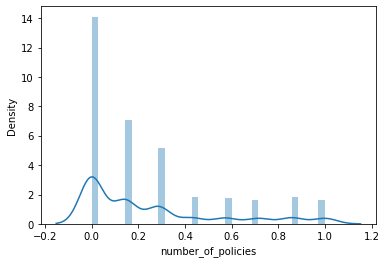

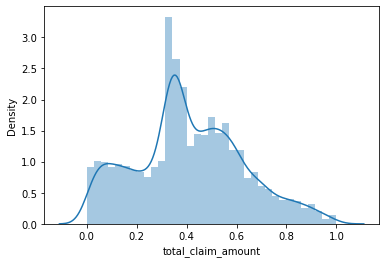

In [215]:
hists(x_min_max)

### 4. Encode the categorical variables

In [238]:
categoricals = data2.select_dtypes(exclude=np.number)

In [241]:
categoricals = categoricals.drop(columns=['effective_to_date'])

In [242]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [243]:
categoricals = pd.get_dummies(categoricals)
categoricals.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
AI49188,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
WW63253,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
HB64268,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
OC83172,0,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0


### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [248]:
data2['effective_to_date'] = pd.to_datetime(data2['effective_to_date'])

In [249]:
data2['day'] = data2['effective_to_date'].dt.day
data2['week'] = data2['effective_to_date'].dt.week
data2['month'] = data2['effective_to_date'].dt.month
data2.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,week,month
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,4,1


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [218]:
x_standardized.shape

(7399, 8)

In [255]:
x_standardized.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_last_claim          float64
months_since_policy_inception    float64
number_of_open_complaints        float64
number_of_policies               float64
total_claim_amount               float64
dtype: object

In [219]:
categoricals.shape

(7399, 114)

In [256]:
categoricals.dtypes

state_Arizona                     uint8
state_California                  uint8
state_Nevada                      uint8
state_Oregon                      uint8
state_Washington                  uint8
response_No                       uint8
response_Yes                      uint8
coverage_Basic                    uint8
coverage_Extended                 uint8
coverage_Premium                  uint8
education_Bachelor                uint8
education_College                 uint8
education_Doctor                  uint8
education_High School or Below    uint8
education_Master                  uint8
employmentstatus_Disabled         uint8
employmentstatus_Employed         uint8
employmentstatus_Medical Leave    uint8
employmentstatus_Retired          uint8
employmentstatus_Unemployed       uint8
gender_F                          uint8
gender_M                          uint8
location_code_Rural               uint8
location_code_Suburban            uint8
location_code_Urban               uint8


In [251]:
data2back = pd.concat([x_standardized, categoricals], axis=1)
data2back.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,-1.037924,0.580752,-0.775939,1.696759,-1.541659,-0.421596,-0.821999,0.027605,0,0,...,0,0,0,0,0,0,1,0,1,0
AI49188,2.156415,0.333534,1.023425,0.299106,-0.361023,-0.421596,-0.346993,0.931647,0,0,...,0,0,0,0,0,0,1,0,1,0
WW63253,0.502573,-1.272446,0.931150,0.299106,0.604952,-0.421596,2.028033,0.749551,0,1,...,0,1,0,0,1,0,0,0,1,0
HB64268,-1.022093,0.171148,-0.591389,-0.299888,-0.146362,-0.421596,-0.821999,-1.200007,0,0,...,0,0,0,1,0,0,0,0,1,0
OC83172,0.695180,0.799023,-0.775939,-0.100224,1.642481,-0.421596,-0.346993,-1.094245,0,0,...,0,0,1,0,0,0,1,0,1,0


In [252]:
data2back['effective_to_date'] = data2['effective_to_date']
data2back['day'] = data2['day']
data2back['week'] = data2['week']
data2back['month'] = data2['month']

In [253]:
data2back.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,effective_to_date,day,week,month
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,-1.037924,0.580752,-0.775939,1.696759,-1.541659,-0.421596,-0.821999,0.027605,0,0,...,0,0,1,0,1,0,2011-02-24,24,8,2
AI49188,2.156415,0.333534,1.023425,0.299106,-0.361023,-0.421596,-0.346993,0.931647,0,0,...,0,0,1,0,1,0,2011-02-19,19,7,2
WW63253,0.502573,-1.272446,0.931150,0.299106,0.604952,-0.421596,2.028033,0.749551,0,1,...,1,0,0,0,1,0,2011-01-20,20,3,1
HB64268,-1.022093,0.171148,-0.591389,-0.299888,-0.146362,-0.421596,-0.821999,-1.200007,0,0,...,0,0,0,0,1,0,2011-02-03,3,5,2
OC83172,0.695180,0.799023,-0.775939,-0.100224,1.642481,-0.421596,-0.346993,-1.094245,0,0,...,0,0,1,0,1,0,2011-01-25,25,4,1


In [254]:
data2back.shape

(7399, 67)

In [258]:
data2back.dtypes

customer_lifetime_value                 float64
income                                  float64
monthly_premium_auto                    float64
months_since_last_claim                 float64
months_since_policy_inception           float64
                                      ...      
vehicle_size_Small                        uint8
effective_to_date                datetime64[ns]
day                                       int64
week                                      int64
month                                     int64
Length: 67, dtype: object